<a href="https://colab.research.google.com/github/hasana0123/Image-Classifier/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = '/content/drive/MyDrive/Colab-Notebooks/archive/data'

In [7]:
image_exts = ['jpg', 'jpeg', 'png','bmp']

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Error : Issue with image {}'.format(image_path))

# Load Data



In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab-Notebooks/archive/data')

Found 9696 files belonging to 3 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

# Class 0 = Angry people
# Class 1 = Happy people
# Class 2 = Sad People

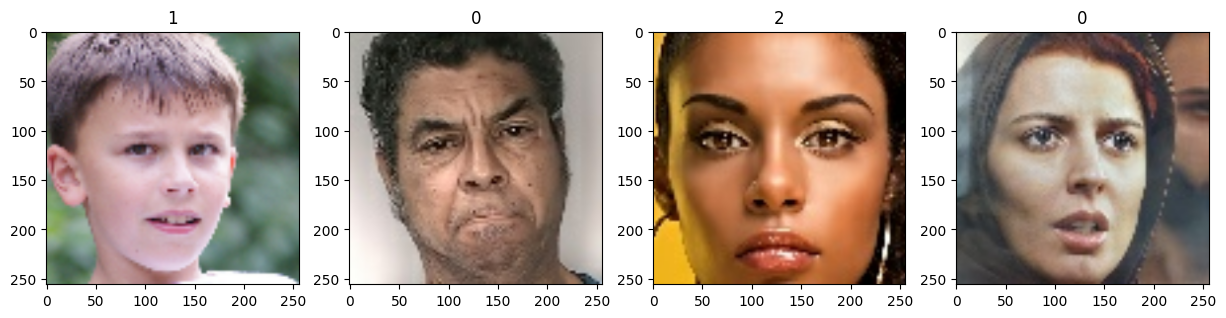

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [14]:
scaled = batch[0]/255
scaled.max()

1.0



#    **Preprocess Data**





In [15]:
# scale data

data = data.map(lambda x,y:(x/255,y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

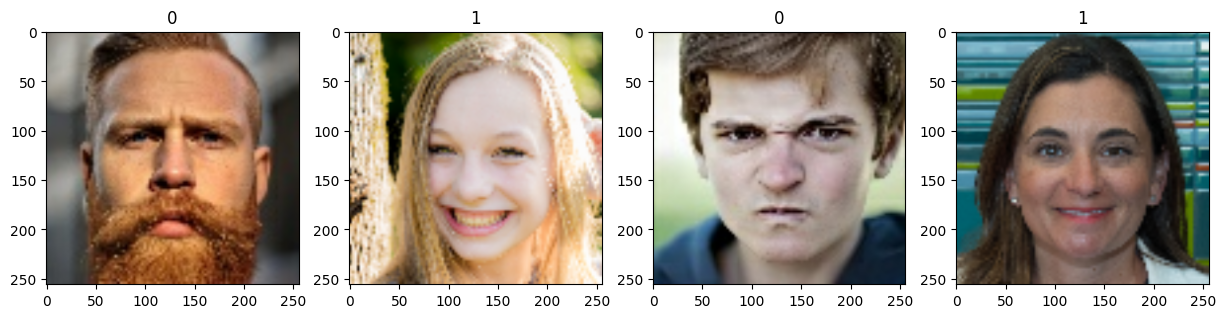

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [23]:
# Split data

len(data)

303

In [24]:
# 70% as train data
# 20% as validation data
# 10% as test data

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
# model = Sequential([])
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')
])



In [31]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam

In [32]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

# Train


In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
212/212 [==============================] - 88s 382ms/step - loss: 0.8370 - accuracy: 0.5653 - val_loss: 0.6532 - val_accuracy: 0.7157
Epoch 2/20
212/212 [==============================] - 82s 382ms/step - loss: 0.5363 - accuracy: 0.7009 - val_loss: 0.5082 - val_accuracy: 0.7551
Epoch 3/20
212/212 [==============================] - 71s 334ms/step - loss: 0.4684 - accuracy: 0.7372 - val_loss: 0.4619 - val_accuracy: 0.7582
Epoch 4/20
212/212 [==============================] - 82s 384ms/step - loss: 0.4456 - accuracy: 0.7510 - val_loss: 0.4510 - val_accuracy: 0.7684
Epoch 5/20
212/212 [==============================] - 82s 385ms/step - loss: 0.4213 - accuracy: 0.7720 - val_loss: 0.4268 - val_accuracy: 0.7792
Epoch 6/20
212/212 [==============================] - 82s 384ms/step - loss: 0.4060 - accuracy: 0.7851 - val_loss: 0.4350 - val_accuracy: 0.7761
Epoch 7/20
212/212 [==============================] - 82s 385ms/step - loss: 0.3949 - accuracy: 0.7916 - val_loss: 0.4234 - val_ac

# Plot performance


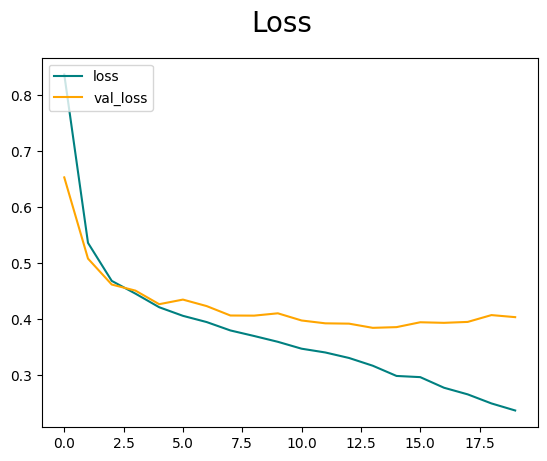

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


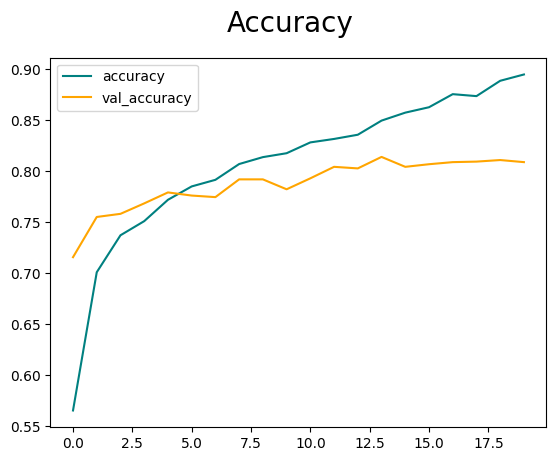

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# Evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)

  yhat = np.argmax(yhat,axis =1)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 28ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8887043, shape=(), dtype=float32) tf.Tensor(0.80937976, shape=(), dtype=float32) tf.Tensor(0.53333336, shape=(), dtype=float32)


# Test

In [43]:
import cv2

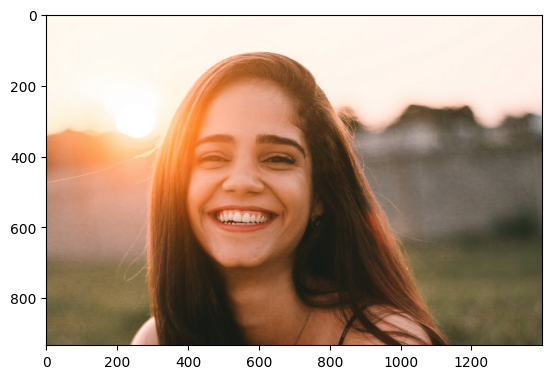

In [104]:
img = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/old-data/Happy/1HEoLBLidT2u4mhJ0oiDgig.png')
if img is None:
  print(f"Failed to load image from {'/content/drive/MyDrive/Colab-Notebooks/happy.jpg'}. Check if the path is correct.")
else:
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert from BGR (OpenCV default) to RGB (Matplotlib expects)
  plt.show()


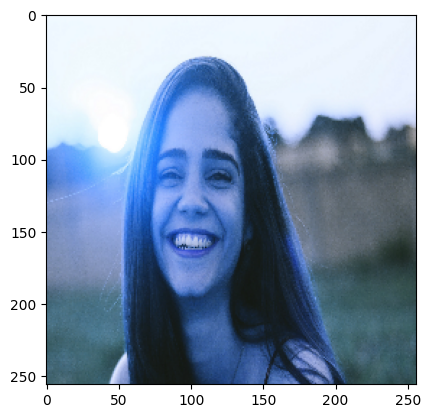

In [105]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [106]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [107]:
yhat

array([[0.874815  , 0.02188741, 0.10329752]], dtype=float32)

In [108]:
predicted_class_index = np.argmax(yhat)



In [109]:
predicted_class_index

0

In [110]:
if predicted_class_index == 0:
    print('Predicted class is Angry')
elif predicted_class_index == 1:
    print('Predicted class is Happy')
elif predicted_class_index == 2:
    print('Predicted class is Sad')

Predicted class is Angry


In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('/content/drive/MyDrive/Colab-Notebooks', 'imageClassifier.keras'))

In [113]:
new_model = load_model('/content/drive/MyDrive/Colab-Notebooks/imageClassifier.keras')

In [114]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 77ms/step


array([[0.874815  , 0.02188741, 0.10329752]], dtype=float32)